# **RRN - LSTM para Stock market prediction -**
***Modelo RNN para analizar mercado de acciones (Stock Market)***



***FUENTE:***

- https://medium.com/@nafiu.dev/stock-market-prediction-using-lstm-will-the-price-go-up-tomorrow-practical-guide-d1df2d54a517
- https://medium.com/@mrconnor/forecasting-the-stock-market-using-lstm-will-it-rise-tomorrow-94ff6b6a34b6

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# yfinance
- yfinance es una popular biblioteca de código abierto desarrollada por Ran Aroussi como un medio para acceder a los datos financieros disponibles en Yahoo Finance.
- Yahoo Finance ofrece una excelente variedad de datos de mercado sobre acciones, bonos, divisas y criptomonedas. También ofrece noticias, informes y análisis del mercado y, además, opciones y datos fundamentales, que lo distinguen de algunos de sus competidores.

- Link: https://gsnchez.com/blog/article/Primeros-pasos-con-yfinance

In [ ]:
data= yf.download("GOOGL", start="2019-01-01", interval="1d")
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,51.360001,53.039501,51.264000,52.734001,52.734001,31868000
2019-01-03,52.533501,53.313000,51.118500,51.273499,51.273499,41960000
2019-01-04,52.127998,54.000000,51.842999,53.903500,53.903500,46022000
2019-01-07,54.048500,54.134998,53.132000,53.796001,53.796001,47446000
2019-01-08,54.299999,54.667500,53.417500,54.268501,54.268501,35414000


***NOTA:***

- Ver pandas-datareader Documentation:https://buildmedia.readthedocs.org/media/pdf/pandas-datareader/latest/pandas-datareader.pdf

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1221 entries, 2019-01-02 to 2023-11-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1221 non-null   float64
 1   High       1221 non-null   float64
 2   Low        1221 non-null   float64
 3   Close      1221 non-null   float64
 4   Adj Close  1221 non-null   float64
 5   Volume     1221 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 66.8 KB


In [ ]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data.isnull().sum().sum()

0

In [ ]:
#Verificando por valores duplicados
data.duplicated().any()

False

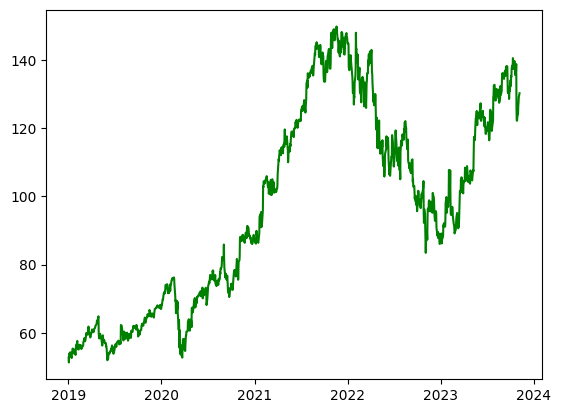

In [ ]:
plt.plot(data.index, data['Close'], color='green', label='Close')
plt.show()

In [ ]:
dataV1 = data.iloc[:,3:4]
dataV1 = dataV1.values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler(feature_range=(0,1))
dataV1 = Scaler.fit_transform(dataV1)

In [ ]:
feature_length = 100

In [ ]:
# Function to create x and y data
def Create_Features_and_Targets(data, feature_length):
  X = list()
  Y = list()
  for i in range(len(data) - feature_length -1):
    X.append(data[i:(i + feature_length), 0])
    Y.append(data[i + feature_length, 0])
  X = np.array(X)
  Y = np.array(Y)
  return X,Y


In [ ]:
# calling the function
X_train,y_train= Create_Features_and_Targets(dataV1,feature_length)

In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape, y_train.shape

((1120, 100, 1), (1120,))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout , LSTM

In [ ]:
# model
model = Sequential([
   LSTM(100,return_sequences=True,input_shape=(X_train.shape[1],1)),
   Dropout(0.3),
   LSTM(100, return_sequences = False),
   Dropout(0.3),

   Dense(1),
])
model.compile(optimizer='adam',loss="mean_squared_error")
model.summary()

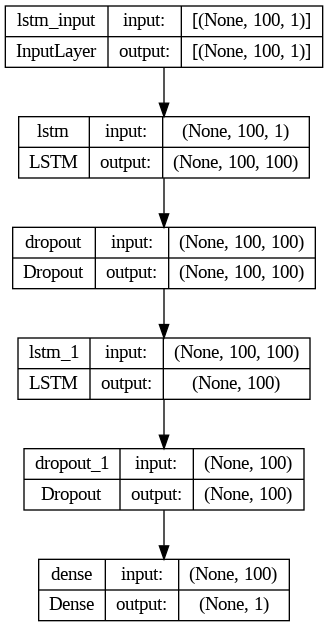

In [ ]:
from keras.utils import plot_model

# Visualización de la red (Modelo), y se guarda el gráfico resultante en disco, en el archivo net.png:
plot_model(model, 'net.png', show_shapes=True)

In [ ]:
# Training the model
history = model.fit(
    X_train,
    y_train,
    epochs = 100,
    batch_size = 12,
    verbose=1,
)

Epoch 1/100
94/94 [==============================] - 11s 9ms/step - loss: 0.0176
Epoch 2/100
94/94 [==============================] - 1s 9ms/step - loss: 0.0048
Epoch 3/100
94/94 [==============================] - 1s 9ms/step - loss: 0.0045
Epoch 4/100
94/94 [==============================] - 1s 9ms/step - loss: 0.0046
Epoch 5/100
94/94 [==============================] - 1s 9ms/step - loss: 0.0037
Epoch 6/100
94/94 [==============================] - 1s 9ms/step - loss: 0.0042
Epoch 7/100
94/94 [==============================] - 1s 9ms/step - loss: 0.0035
Epoch 8/100
94/94 [==============================] - 1s 9ms/step - loss: 0.0032
Epoch 9/100
94/94 [==============================] - 1s 9ms/step - loss: 0.0032
Epoch 10/100
94/94 [==============================] - 1s 9ms/step - loss: 0.0040
Epoch 11/100
94/94 [==============================] - 1s 9ms/step - loss: 0.0030
Epoch 12/100
94/94 [==============================] - 1s 12ms/step - loss: 0.0030
Epoch 13/100
94/94 [===============

In [ ]:
testData = data.iloc[:,3:4] # Get 'Close' feature
y_real=testData.iloc[feature_length+1:,0:].values #Actual values
x_test = testData.iloc[:,0:].values # data to test
# normalizing the Data using Scaler.transform function
x_test = Scaler.transform(x_test)
x_test, y_test = Create_Features_and_Targets(x_test, feature_length)
# Making data 3 dimensional
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
y_pred = model.predict(x_test)
predicted_price = Scaler.inverse_transform(y_pred)

35/35 [==============================] - 1s 5ms/step


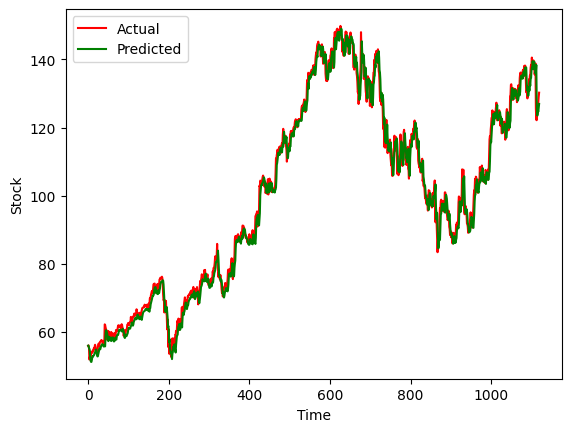

In [ ]:
plt.plot(y_real, color = 'red', label = 'Actual')
plt.plot(predicted_price, color = 'green', label = 'Predicted')
plt.xlabel('Time')
plt.ylabel('Stock')
plt.legend()
plt.show()

In [ ]:
def predict_given_date(data, date, feature_length):
  if date not in data.index:
     data.loc[pd.Timestamp(date)] = 0
  idx = data.index.get_loc(date)
  close_col = data.iloc[:,3:4]
  close_col = close_col.iloc[idx - feature_length : idx,:].values
  close_col = np.expand_dims(Scaler.transform(close_col) , axis = 0)
  Prediction = model.predict(close_col)
  Prediction = Scaler.inverse_transform(Prediction)
  return Prediction

In [ ]:

# calling the function
predict_given_date(data, '2023-12-01', feature_length)

1/1 [==============================] - 0s 22ms/step


array([[63.757393]], dtype=float32)

In [ ]:
# only gives the dates that already exists in the dataset
l = data.index.get_loc('2022-09-20')
data.iloc[l: l+1,:]['Close']
# well we can see the predicted value is very close

Date
2022-09-20    101.139999
Name: Close, dtype: float64

Date

2022-09-20   
 101.139999

Name: Close, dtype: float64